In [1]:
import mlflow

In [2]:
experiments_name = mlflow.search_experiments()

In [3]:
experiments_name

[<Experiment: artifact_location='file:///storage/vast-gfz-hpc-01/home/khuzaima/project/thesis_seismology/mlruns/282425757216478169', creation_time=1761258694608, experiment_id='282425757216478169', last_update_time=1761258694608, lifecycle_stage='active', name='training_5_epochs', tags={}>,
 <Experiment: artifact_location='file:///storage/vast-gfz-hpc-01/home/khuzaima/project/thesis_seismology/mlruns/153534368826863734', creation_time=1761253665741, experiment_id='153534368826863734', last_update_time=1761253665741, lifecycle_stage='active', name='training_2_epochs', tags={'mlflow.experimentKind': 'custom_model_development'}>,
 <Experiment: artifact_location='file:///storage/vast-gfz-hpc-01/home/khuzaima/project/thesis_seismology/mlruns/232554606776605272', creation_time=1760991000784, experiment_id='232554606776605272', last_update_time=1760991000784, lifecycle_stage='active', name='training_test_hydra', tags={}>,
 <Experiment: artifact_location='file:///storage/vast-gfz-hpc-01/home/k

In [4]:
 experiment_path = [exp.name for exp in experiments_name if "training_5_epochs" in exp.name][0]

In [5]:
experiment_dict = dict(mlflow.get_experiment_by_name(experiment_path))

In [6]:
experiment_dict

{'artifact_location': 'file:///storage/vast-gfz-hpc-01/home/khuzaima/project/thesis_seismology/mlruns/282425757216478169',
 'creation_time': 1761258694608,
 'experiment_id': '282425757216478169',
 'last_update_time': 1761258694608,
 'lifecycle_stage': 'active',
 'name': 'training_5_epochs',
 'tags': {}}

In [7]:
experiment_id = experiment_dict['experiment_id']
runs_df = mlflow.search_runs(experiment_id)

In [8]:
runs_df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.train_loss,metrics.epoch,metrics.val_loss,params.sigma,params.sample_boundaries,params.lr,params.optimizer_params,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.name
0,cd81f57a2a9b4e658f61211dcde9f430,282425757216478169,FINISHED,file:///storage/vast-gfz-hpc-01/home/khuzaima/...,2025-10-23 22:31:38.369000+00:00,2025-10-24 00:03:59.121000+00:00,0.102661,4.0,0.098543,20,"(None, None)",0.001,None,LOCAL,amazing-fish-378,khuzaima,/storage/vast-gfz-hpc-01/home/khuzaima/minifor...


In [9]:
runs_df_filtered = runs_df[runs_df['status'] == 'FINISHED'][[col for col in runs_df.columns if col.startswith('params.') or col.startswith('metrics.')]].dropna()
runs_df_indices = runs_df_filtered.sort_values(f"metrics.val_loss", ascending=False).index
    
runs_df = runs_df.loc[runs_df_indices, :] 

In [10]:
best_run_id = runs_df['run_id'].tolist()[0]

best_run_df = runs_df[runs_df["run_id"] == best_run_id]

In [11]:
best_run_df["artifact_uri"].iloc[0]

'file:///storage/vast-gfz-hpc-01/home/khuzaima/project/thesis_seismology/mlruns/282425757216478169/cd81f57a2a9b4e658f61211dcde9f430/artifacts'

In [12]:
best_run_df["tags.mlflow.source.name"].iloc[0]

'/storage/vast-gfz-hpc-01/home/khuzaima/miniforge3/envs/seisbench/bin/train-seisbench'

In [13]:
import sys
sys.path.append("./src/seisbench_training/utils")
from model_utils import SeisBenchLit

/storage/vast-gfz-hpc-01/home/khuzaima/project/seisbench/seisbench/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [14]:
artifact_dir = best_run_df["artifact_uri"].iloc[0]

In [15]:
model_path = artifact_dir+"/best_model/best_model.ckpt"

In [16]:
model = SeisBenchLit.load_from_checkpoint(model_path)

In [17]:
import torch
waveform_data = torch.load("example_waveform.pt", map_location=torch.device("cpu"))
labels = torch.load("example_labels.pt", map_location=torch.device("cpu"))

In [62]:
waveform_data

tensor([[[ 0.3235,  0.2888,  0.2888,  ...,  0.5663,  0.5837,  0.5837],
         [-0.3678, -0.3678, -0.4332,  ...,  0.1335,  0.1553,  0.1771],
         [-0.3066, -0.2416, -0.2850,  ..., -0.2633, -0.2633, -0.2200]],

        [[ 0.0145,  0.0367,  0.0628,  ...,  0.0349,  0.0058, -0.0477],
         [-0.0050, -0.1776, -0.2775,  ..., -0.0262, -0.0827, -0.0608],
         [-0.0456, -0.0323,  0.0994,  ..., -0.0101,  0.0317,  0.0100]],

        [[-0.2723, -0.2792, -0.2932,  ..., -0.6940, -0.6766, -0.6975],
         [-0.0597, -0.0438, -0.0537,  ...,  0.0948,  0.0829,  0.1225],
         [-0.1480, -0.1504, -0.1722,  ...,  0.0139,  0.0091,  0.0260]],

        ...,

        [[ 0.1655,  0.1528,  0.1417,  ...,  0.1838,  0.1885,  0.1949],
         [ 0.4536,  0.4528,  0.4561,  ..., -0.0802, -0.0702, -0.0552],
         [ 0.4908,  0.4793,  0.4743,  ...,  0.3375,  0.3408,  0.3573]],

        [[-0.8193, -0.8256, -0.7814,  ...,  0.6206,  0.6277,  0.6458],
         [ 0.7146,  0.6956,  0.7035,  ..., -0.1387, -0.

In [18]:
import seisbench.models as sbm
import seisbench.generate as sbg
import numpy as np
import pytorch_lightning as pl
import torch

In [19]:
def get_eval_augmentations():
        return [
            sbg.SteeredWindow(windowlen=3001, strategy="pad"),
            sbg.ChangeDtype(np.float32),
            sbg.Normalize(demean_axis=-1, amp_norm_axis=-1, amp_norm_type="peak"),
        ]

In [20]:
import pandas as pd

labels = pd.read_csv("output/generated_labels.csv")

In [21]:
import seisbench.data as sbd


In [22]:
dataset = sbd.bohemia.BohemiaSaxony(
     sampling_rate=100,
     cache = "full",
     component_order = "ZNE"
)

In [23]:
from pathlib import Path

In [24]:
results = {}  # dictionary to store DataFrames

for set_name in ["dev", "test"]:
    split = dataset.get_split(set_name)
    split.preload_waveforms(pbar=True)
    labels_subset = labels[labels["trace_split"] == set_name].copy()  # avoid modifying original df
    generator = sbg.SteeredGenerator(split, labels_subset)
    generator.add_augmentations(get_eval_augmentations())

    loader = torch.utils.data.DataLoader(
        generator, batch_size=1024, shuffle=False, num_workers=16
    )
    trainer = pl.Trainer()

    predictions = trainer.predict(model, loader)
    merged_predictions = []
    for i, _ in enumerate(predictions[0]):
        merged_predictions.append(torch.cat([x[i] for x in predictions]))

    merged_predictions = [x.cpu().numpy() for x in merged_predictions]
    labels_subset["score_detection"] = merged_predictions[0]
    labels_subset["score_p_or_s"] = merged_predictions[1]
    labels_subset["p_sample_pred"] = merged_predictions[2] + labels_subset["start_sample"]
    labels_subset["s_sample_pred"] = merged_predictions[3] + labels_subset["start_sample"]

    # store the DataFrame in memory instead of saving to file
    results[set_name] = labels_subset

# Now you have both DataFrames in memory:
dev_df = results["dev"]
test_df = results["test"]

Preloading waveforms: 100%|██████████| 24049/24049 [00:08<00:00, 2776.60it/s]
/home/khuzaima/miniforge3/envs/seisbench/lib/python3.13/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/khuzaima/miniforge3/envs/seisbench/lib/python3 ...
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Preloading waveforms: 100%|██████████| 23718/23718 [00:15<00:00, 1564.19it/s]
/home/khuzaima/miniforge3/envs/seisbench/lib/python3.13/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/khuzaima/miniforge3/envs/seisbench/lib/python3 ...
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [27]:
dev_df

,trace_name,trace_idx,trace_split,sampling_rate,start_sample,end_sample,phase_label,full_phase_label,phase_onset,score_detection,score_p_or_s,p_sample_pred,s_sample_pred
0,"bucket8$0,:3,:12150",0,dev,100,5088,6088,P,Pg,6000.0,0.348374,3.015216,5966,6079
1,"bucket8$0,:3,:12150",0,dev,100,6078,7078,S,Sg,6149.0,0.563871,0.555027,6162,6156
2,"bucket8$1,:3,:12173",1,dev,100,5064,6064,P,Pg,6000.0,0.584378,9.863102,6008,5991
3,"bucket8$1,:3,:12173",1,dev,100,6121,7121,S,Sg,6172.0,0.540468,0.394884,6181,6181
4,"bucket8$2,:3,:12001",2,dev,100,5750,6750,P,Pg,6000.0,0.102930,0.598505,6469,6485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83938,"bucket232$483,:3,:12202",47725,dev,100,6072,7072,S,Sg,6202.0,0.180295,0.461622,6192,6192
83939,"bucket232$484,:3,:12000",47726,dev,100,5165,6165,P,Pg,5999.0,0.135029,0.357135,5893,5895
83940,"bucket232$485,:3,:12000",47727,dev,100,5119,6119,S,Sg,6000.0,0.464636,0.492792,5834,5987
83941,"bucket232$486,:3,:12227",47728,dev,100,5158,6158,P,Pg,5999.0,0.043711,0.806097,5887,6121


In [28]:
dev_df["phase_label_bin"] = dev_df["phase_label"] == "P"
test_df["phase_label_bin"] = test_df["phase_label"] == "P"

In [29]:
dev_pred = dev_df
test_pred =test_df

In [30]:
def add_aux_columns(pred):
    for col in ["s_sample_pred", "score_p_or_s"]:
            if col not in pred.columns:
                pred[col] = np.nan

add_aux_columns(dev_pred)
add_aux_columns(test_pred)

In [32]:
def nanmask(pred):
    mask = np.logical_and(
            np.isnan(pred["p_sample_pred"]), np.isnan(pred["s_sample_pred"])
        )
    mask = np.logical_and(mask, np.isnan(pred["score_p_or_s"]))
    
    return mask

dev_pred = dev_pred[~nanmask(dev_pred)]
test_pred = test_pred[~nanmask(test_pred)]

In [46]:
from sklearn.metrics import (
    precision_recall_curve,
    precision_recall_fscore_support,
    roc_curve,
    matthews_corrcoef,
)


In [35]:
dev_pred["score_p_or_s"] = np.clip(dev_pred["score_p_or_s"].values, -1e100, 1e100)
test_pred["score_p_or_s"] = np.clip(test_pred["score_p_or_s"].values, -1e100, 1e100)

/home/khuzaima/miniforge3/envs/seisbench/lib/python3.13/site-packages/numpy/_core/_methods.py:115: RuntimeWarning: overflow encountered in cast
  return um.clip(a, min, max, out=out, **kwargs)


In [36]:
dev_pred_restricted = dev_pred[~np.isnan(dev_pred["score_p_or_s"])]
test_pred_restricted = test_pred[~np.isnan(test_pred["score_p_or_s"])]

In [37]:
prec, recall, thr = precision_recall_curve(
            dev_pred_restricted["phase_label_bin"], dev_pred_restricted["score_p_or_s"]
        )

In [38]:
f1 = 2 * prec * recall / (prec + recall)
opt_index = np.nanargmax(f1)
opt_thr = thr[opt_index]
mcc_thrs = np.sort(dev_pred["score_p_or_s"].values)
mcc_thrs = mcc_thrs[np.linspace(0, len(mcc_thrs) - 1, 50, dtype=int)]
mccs = []
for thr in mcc_thrs:
    mccs.append(
                matthews_corrcoef(
                    dev_pred["phase_label_bin"], dev_pred["score_p_or_s"] > thr
                )
            )
mcc = np.max(mccs)
mcc_thr = mcc_thrs[np.argmax(mccs)]

In [39]:
dev_stats = {
            "dev_phase_precision": prec[opt_index],
            "dev_phase_recall": recall[opt_index],
            "dev_phase_f1": f1[opt_index],
            "phase_threshold": opt_thr,
            "dev_phase_mcc": mcc,
            "phase_threshold_mcc": mcc_thr,
        }

In [42]:
prec, recall, f1, _ = precision_recall_fscore_support(
            test_pred_restricted["phase_label_bin"],
            test_pred_restricted["score_p_or_s"] > opt_thr,
            average="binary",
        )

In [43]:
mcc = matthews_corrcoef(
            test_pred["phase_label_bin"], test_pred["score_p_or_s"] > mcc_thr
        )

In [44]:
test_stats = {
            "test_phase_precision": prec,
            "test_phase_recall": recall,
            "test_phase_f1": f1,
            "test_phase_mcc": mcc,
        }

In [45]:
test_stats

{'test_phase_precision': 0.9164448880017743,
 'test_phase_recall': 0.8643066304120477,
 'test_phase_f1': 0.8896124865446717,
 'test_phase_mcc': 0.8041962571919594}

Text(0, 0.5, 'true positive rate')

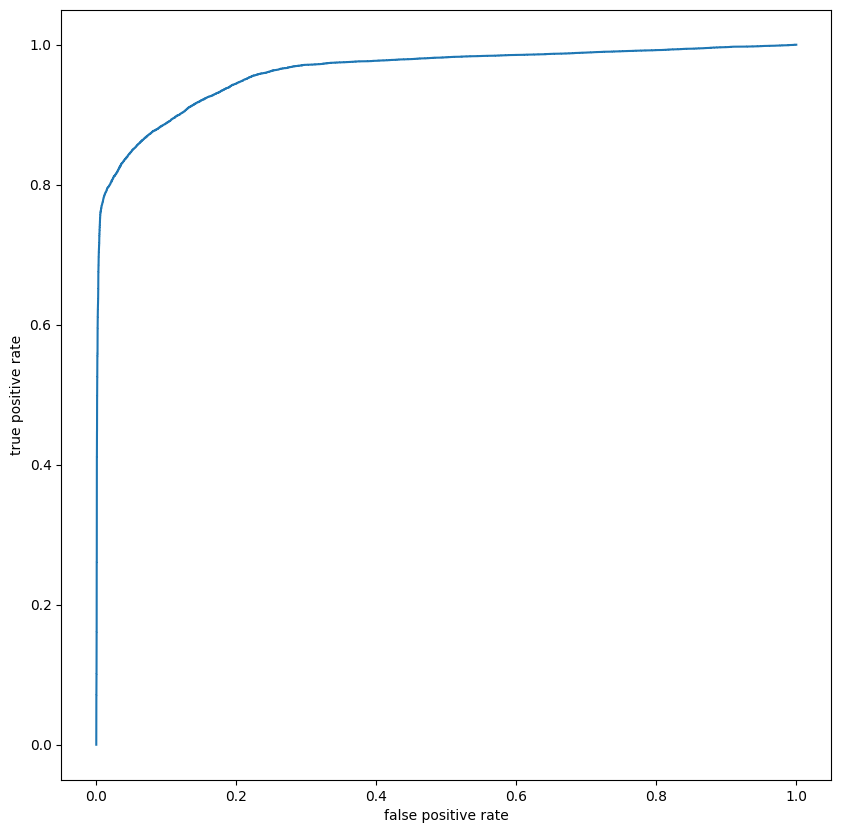

In [47]:
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(test_pred["phase_label_bin"], test_pred["score_p_or_s"])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(fpr, tpr)
ax.set_aspect("equal")

ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")

In [52]:
from sklearn import metrics

In [54]:
pred_phase = test_pred[test_pred["phase_label"] == "P"]
pred_col = f"{"P".lower()}_sample_pred"

In [56]:
pred_phase[pred_col] - pred_phase["phase_onset"]


mae = metrics.mean_absolute_error(
    pred_phase["phase_onset"],
    pred_phase[pred_col]
)

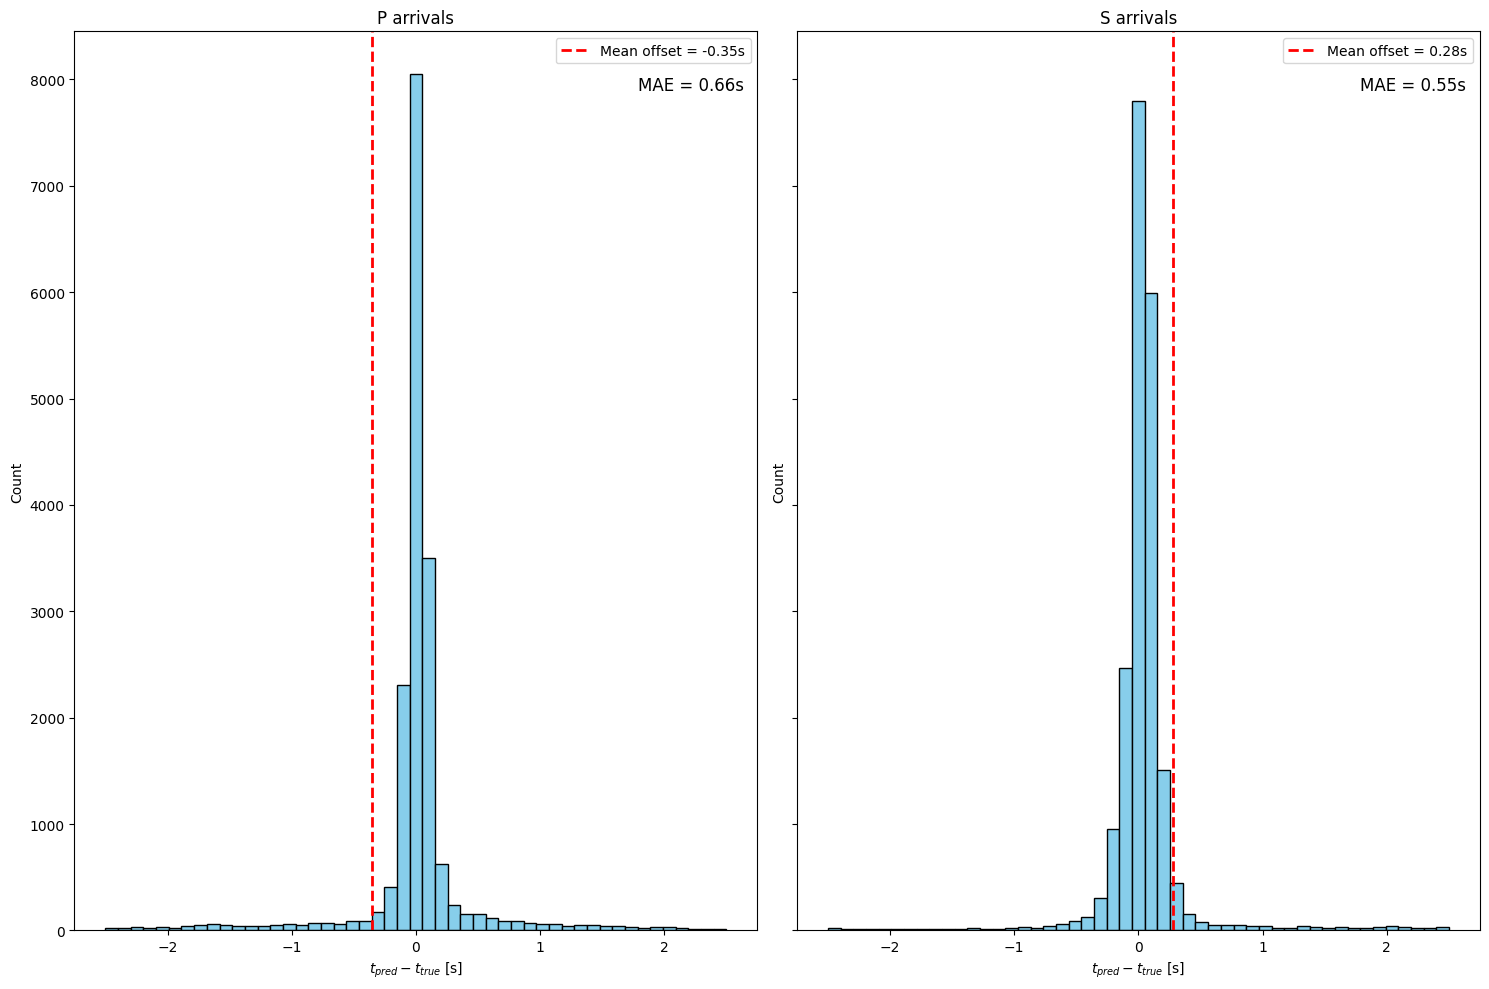

In [57]:
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(1, 2, sharey=True)

for i, phase in enumerate(["P", "S"]):
    ax = axs[i]
    ax.set_title(f"{phase} arrivals")

    pred_phase = test_pred[test_pred["phase_label"] == phase]
    pred_col = f"{phase.lower()}_sample_pred"

    # Time difference in seconds
    diff = (pred_phase[pred_col] - pred_phase["phase_onset"]) / pred_phase["sampling_rate"]

    # Compute stats
    mean_offset = diff.mean()
    mae = metrics.mean_absolute_error(pred_phase["phase_onset"], pred_phase[pred_col]) / pred_phase["sampling_rate"].mean()

    # Plot histogram
    bins = np.linspace(-2.5, 2.5, 50)
    ax.hist(diff, bins=bins, color="skyblue", edgecolor="k")
    ax.axvline(mean_offset, color="r", linestyle="--", linewidth=2, label=f"Mean offset = {mean_offset:.2f}s")

    # Axis labels and annotation
    ax.set_xlabel("$t_{pred} - t_{true}$ [s]")
    ax.set_ylabel("Count")
    ax.legend()
    ax.text(0.98, 0.95, f"MAE = {mae:.2f}s", transform=ax.transAxes, ha="right", va="top", fontsize=12, color="k")

plt.tight_layout()
plt.show()